# 1. Linear Regression


In [ ]:
# 1. Linear Regression
import pandas as pd # read data,...
import numpy as np
import requests # HTTP

In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
file_name = "usedcars.csv"

response = requests.get(file_path)
response.raise_for_status()

with open(file_name, 'wb') as f:
  f.write(response.content)

df = pd.read_csv(file_name)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df[['highway-mpg', 'price']].head(10)

,highway-mpg,price
0,27,13495.0
1,27,16500.0
2,26,16500.0
3,30,13950.0
4,22,17450.0
5,25,15250.0
6,25,17710.0
7,25,18920.0
8,20,23875.0
9,29,16430.0


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y) # data X, Y -> b0, b1
lm.intercept_ # 38423.3058581574 (b0)
lm.coef_ # array([-821.73337832]) (b1)
# -> Price = 38423.31 - 821.73 x highway-mpg (predict car price based on highway-mpg)

Yhat=lm.predict(X)
Yhat[0:5] # predict 5 results

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
X

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
196,28
197,25
198,23
199,27


# 2. Multiple Linear Regression

(0.0, 48177.67858476879)

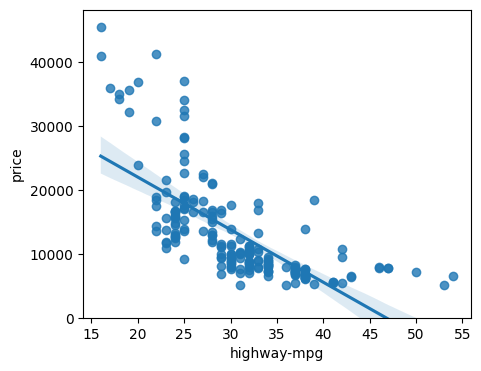

In [ ]:
# 2. Multiple Linear Regression
import matplotlib.pyplot as plt
MV = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
P = df['price']
lm1 = LinearRegression()
lm1.fit(MV, P)
lm1.intercept_
lm1.coef_

# visualization : highway-mpg vs price
import seaborn as sns
%matplotlib inline
width = 5
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

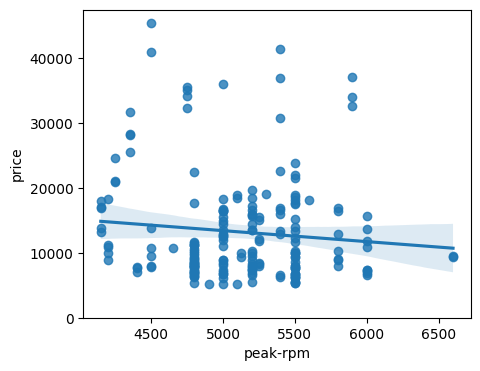

In [ ]:
# visualization : peak-rpm vs price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<ipython-input-15-5e091e7a7e1e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-15-5e091e7a7e1e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

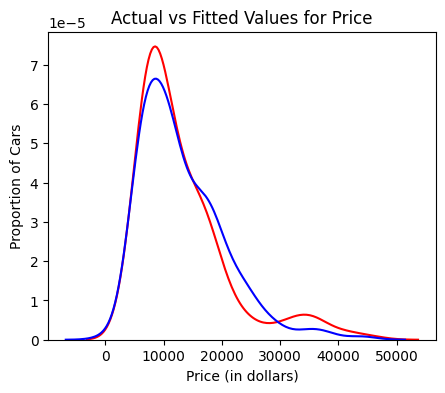

In [ ]:
# visualization : [horsepower, curb-weight, engine-size, highway-mpg] vs price
Y_hat = lm1.predict(MV)
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# 3. Polynomial Regression

In [ ]:
# 3. Polynomial regression
df['highway-mpg'].min() # 16
df['highway-mpg'].max() # 54

54

(0.0, 48182.975192920036)

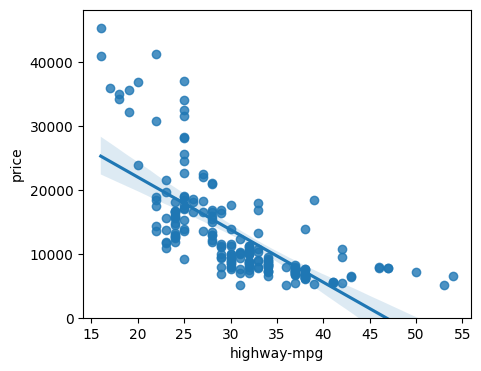

In [ ]:
width = 5
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
# -> 3rd order (cubic)

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3) #creates the polynomial features of order n
p = np.poly1d(f) #p becomes the polynomial model used to generate the predicted output
print(p)
# YHat_3 = p(x)
# YHat_3

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


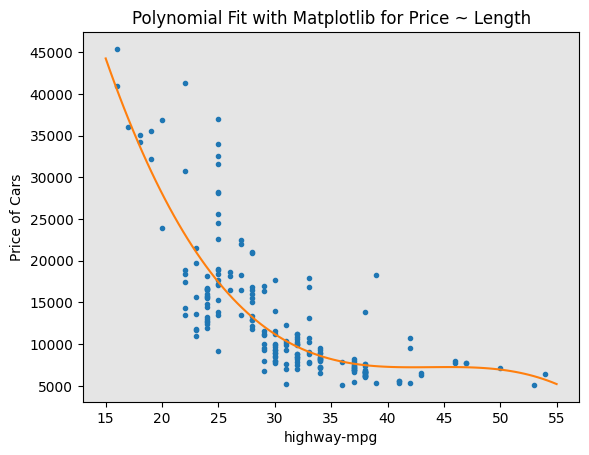

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100) # 100 gtr được phân bố đều từ 15 đến 55
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
PlotPolly(p, x, y, 'highway-mpg')

# Measures for In-Sample Evaluation

In [ ]:
# 1. Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
mse_slr = mean_squared_error(df["price"], Yhat)
mse_slr
r2_score_slr = lm.score(X,Y)
r2_score_slr
# R^2 ~ 0.5 (not good)

0.4965911884339176

In [ ]:
# 2. Multiple Linear Regression
lm1.score(MV, P)
# R^2 ~ 0.8 (better)

0.8093562806577457

In [ ]:
# 3. Polynomial Regression
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652
